# Final Project

## Data Preprocessing 

In [1]:
import pandas as pd

In [2]:
# Specify the path to your CSV file
file_path = '/Users/rnehe/Desktop/ANA630\Week4/Sales Transaction v.4a.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  


In [3]:
# Get the row count using the len() function
row_count_len = len(df)
print(f"Row count using len(): {row_count_len}")

Row count using len(): 536350


### Missing Values

In [4]:
# Function to display missing values
def missing_values_table(df):
    
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

# Get the missing values summary
missing_values_summary = missing_values_table(df)
print(missing_values_summary)

Your selected dataframe has 8 columns.
There are 1 columns that have missing values.
            Missing Values  % of Total Values
CustomerNo              55                0.0


In [5]:
# Pull up rows with any missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Display rows with missing values
print("\nRows with missing values:")
print(rows_with_missing)


Rows with missing values:
       TransactionNo        Date ProductNo  \
6511         C581406   12/8/2019    46000M   
6512         C581406   12/8/2019    46000S   
90098        C575153   11/8/2019     22947   
102671       C574288   11/3/2019     22178   
117263       C573180  10/28/2019     23048   
163160       C569495   10/4/2019     21843   
190598       C567518   9/20/2019     22846   
192284       C567518   9/20/2019     21871   
242406       C563015   8/11/2019    46000M   
242407       C563015   8/11/2019    46000S   
246334       C562617    8/8/2019     23243   
254250       C561966    8/1/2019     22371   
254254       C562030    8/1/2019    84595E   
260633       C561239   7/26/2019     22427   
260634       C561239   7/26/2019     22426   
260635       C561239   7/26/2019     84755   
276396       C559949   7/14/2019     22699   
285494       C559296    7/7/2019     23001   
285495       C559296    7/7/2019     22616   
285496       C559296    7/7/2019     23298   
297259 

## Data Cleaning

In [6]:
# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Remove any rows with missing values
df_cleaned = df.dropna()

# Remove all rows with a negative integer value for Quantity
df_cleaned = df_cleaned[df_cleaned['Quantity'] >= 0]

# Remove the 'Country' and 'Date' columns
df_cleaned = df_cleaned.drop(columns=['Country', 'Date'])

# Round the values in the 'Price' column to whole numbers and convert to integers
df_cleaned['Price'] = df_cleaned['Price'].round().astype(int)

# Display the final cleaned DataFrame
print("\nFinal Cleaned DataFrame:")
print(df_cleaned)

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)

Original DataFrame:
       TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         

## Exploratory Data Analysis

### Boxplots

In [7]:
import matplotlib.pyplot as plt

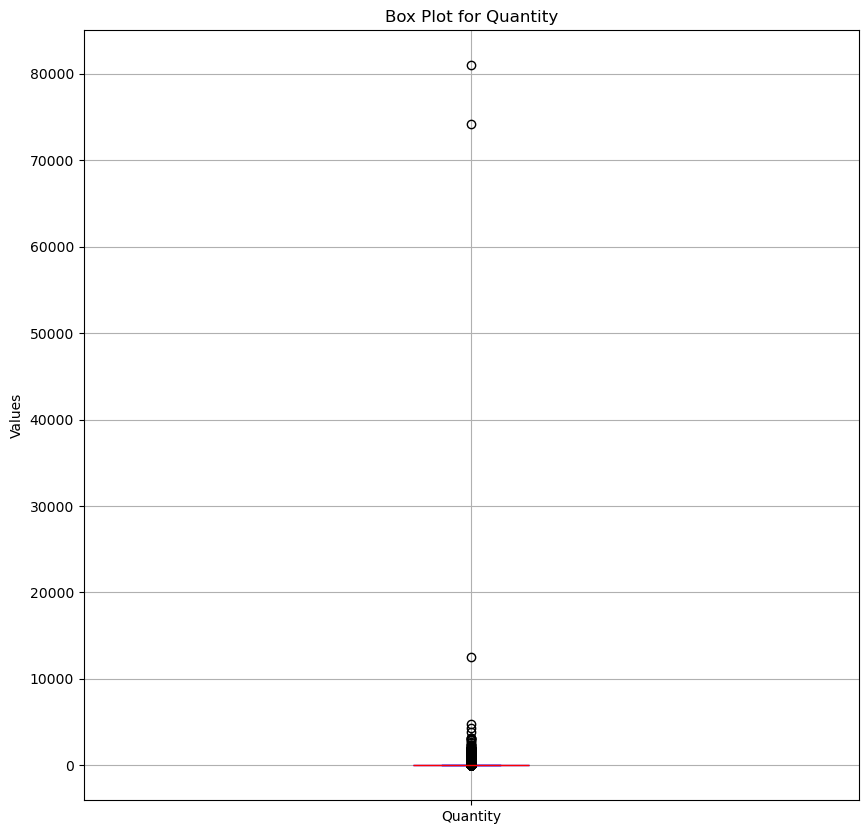

In [40]:
# Create a figure for the box plot
plt.figure(figsize=(10, 10))

# Create a box plot for the 'Quantity' variable
boxplot = df_cleaned[['Quantity']].boxplot(patch_artist=True, 
                                           boxprops=dict(facecolor='lightblue', color='blue'), 
                                           whiskerprops=dict(color='blue'), 
                                           capprops=dict(color='blue'), 
                                           medianprops=dict(color='red'))

# Set the title and labels
plt.title('Box Plot for Quantity')
plt.ylabel('Values')

# Show the plot
plt.show()

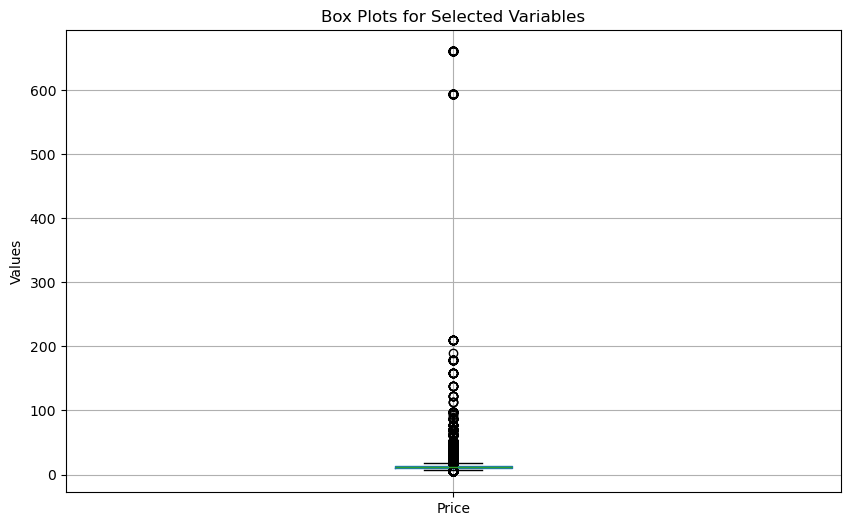

In [39]:
# Create box plots for specific columns
plt.figure(figsize=(10, 6))
df[['Price']].boxplot()
plt.title('Box Plots for Selected Variables')
plt.ylabel('Values')
plt.show()

### Bar Charts

In [10]:
import seaborn as sns

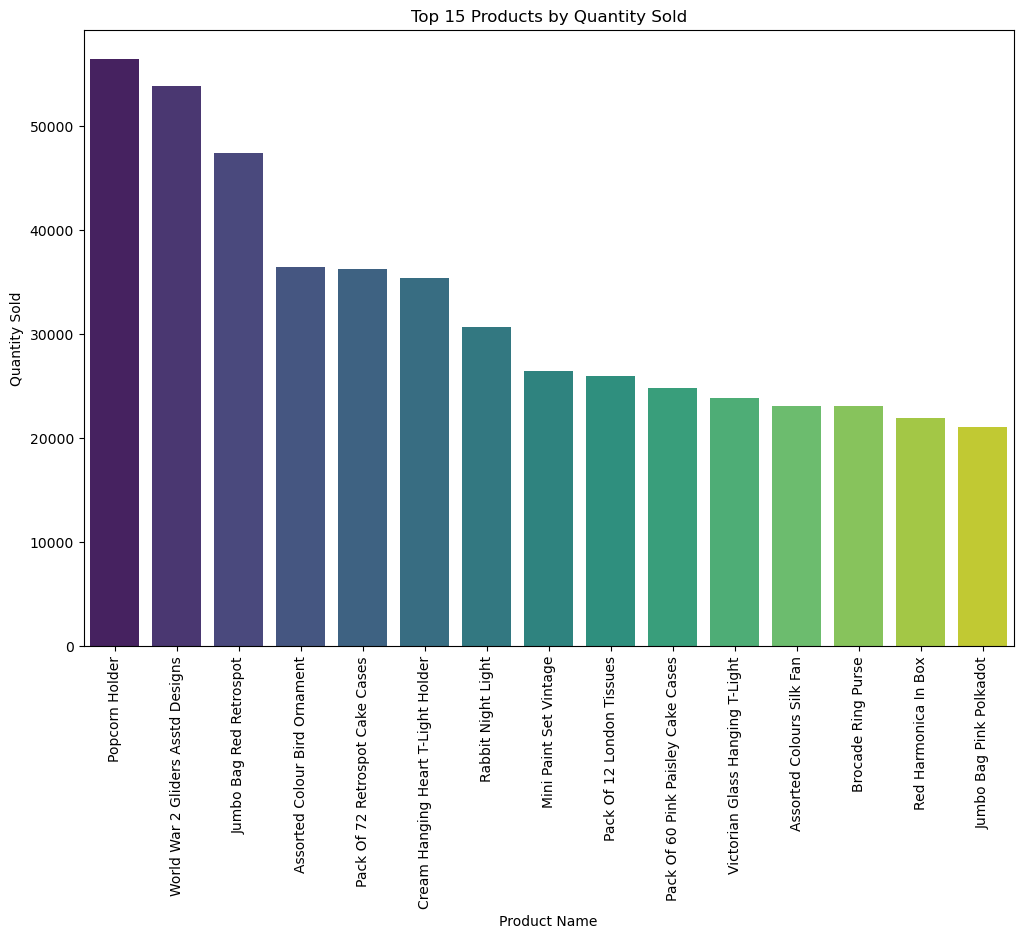

In [11]:
#Aggregate data by product name
product_quantity = df.groupby('ProductName')['Quantity'].sum().reset_index()

# Sort data by quantity sold and select the top 15 products
top_15_products = product_quantity.sort_values(by='Quantity', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='ProductName', y='Quantity', data=top_15_products, palette='viridis')
plt.title('Top 15 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()

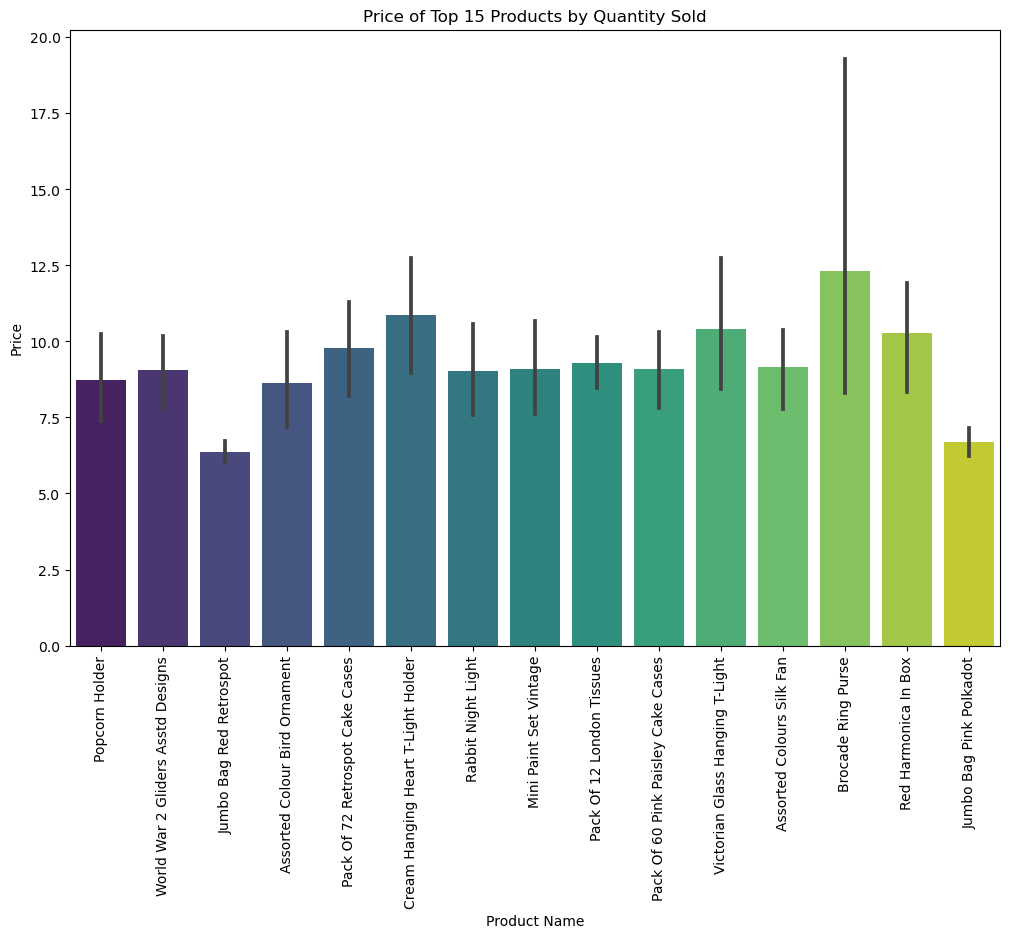

In [12]:
# Merge the top 15 products with the original DataFrame to get the cost
top_15_with_cost = top_15_products.merge(df[['ProductName', 'Price']], on='ProductName').drop_duplicates()

plt.figure(figsize=(12, 8))
sns.barplot(x='ProductName', y='Price', data=top_15_with_cost, palette='viridis')
plt.title('Price of Top 15 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

## Summary Tables

In [15]:
# Create a summary table with min, max, mean, and median for 'Price' and 'Quantity'
summary_table = df_cleaned[['Price', 'Quantity']].agg(['min', 'max', 'mean', 'median'])

# Display the summary table
print("\nSummary Table for 'Price' and 'Quantity':")
print(summary_table)


Summary Table for 'Price' and 'Quantity':
            Price      Quantity
min       5.00000      1.000000
max     661.00000  80995.000000
mean     12.61832     10.594679
median   12.00000      3.000000


## Histograms

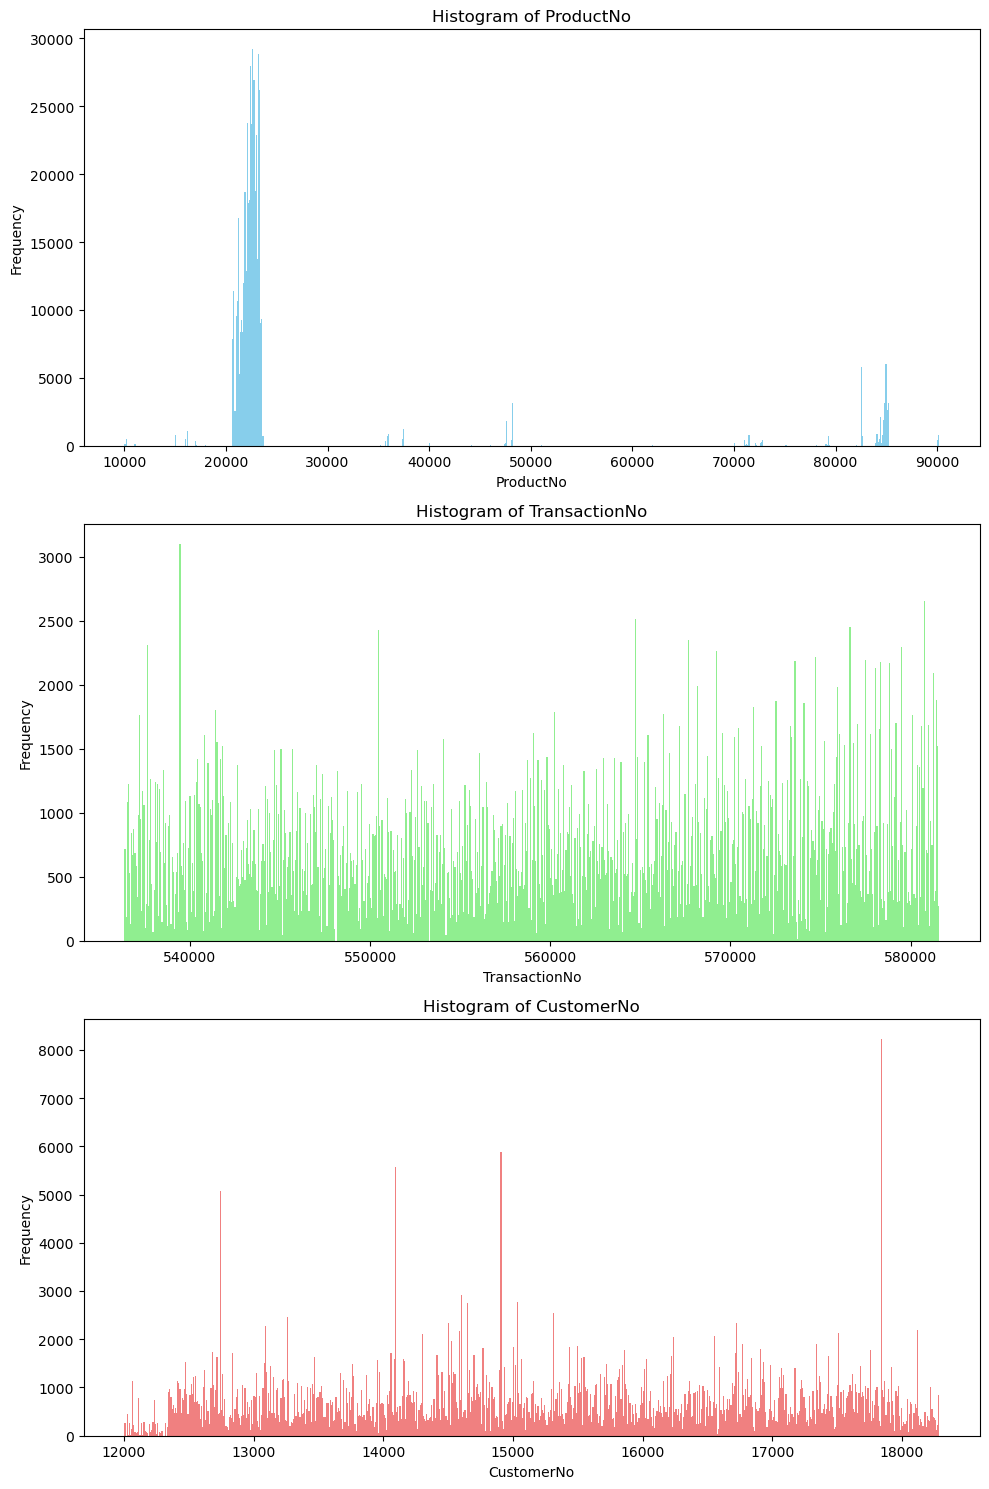

In [43]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histograms
axes[0].hist(df_cleaned['ProductNo'], bins=726, color='skyblue')
axes[0].set_title('Histogram of ProductNo')
axes[0].set_xlabel('ProductNo')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_cleaned['TransactionNo'], bins=726, color='lightgreen')
axes[1].set_title('Histogram of TransactionNo')
axes[1].set_xlabel('TransactionNo')
axes[1].set_ylabel('Frequency')

axes[2].hist(df_cleaned['CustomerNo'], bins=726, color='lightcoral')
axes[2].set_title('Histogram of CustomerNo')
axes[2].set_xlabel('CustomerNo')
axes[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [17]:
print("Data types of each column:")
print(df_cleaned.dtypes)

# Convert 'Price' and 'Quantity' columns to float
df_cleaned['Price'] = df_cleaned['Price'].astype(float)
df_cleaned['Quantity'] = df_cleaned['Quantity'].astype(float)
df_cleaned['ProductNo'] = pd.to_numeric(df_cleaned['ProductNo'], errors='coerce')
df_cleaned['TransactionNo'] = pd.to_numeric(df_cleaned['TransactionNo'], errors='coerce')

# Display the modified DataFrame and its data types
print("\nModified DataFrame:")
print(df_cleaned)
print("\nModified data types:")
print(df_cleaned.dtypes)

Data types of each column:
TransactionNo     object
ProductNo         object
ProductName       object
Price              int32
Quantity           int64
CustomerNo       float64
dtype: object

Modified DataFrame:
        TransactionNo  ProductNo                          ProductName  Price  \
0              581482    22485.0        Set Of 2 Wooden Market Crates   21.0   
1              581475    22596.0  Christmas Star Wish List Chalkboard   11.0   
2              581475    23235.0             Storage Tin Vintage Leaf   12.0   
3              581475    23272.0    Tree T-Light Holder Willie Winkie   11.0   
4              581475    23239.0    Set Of 4 Knick Knack Tins Poppies   12.0   
...               ...        ...                                  ...    ...   
536320         536585    37449.0   Ceramic Cake Stand + Hanging Cakes   20.0   
536321         536590    22776.0         Sweetheart 3 Tier Cake Stand   20.0   
536322         536590    22622.0       Box Of Vintage Alphabet Block


Correlation Matrix for selected columns:
               Quantity     Price  ProductNo  TransactionNo
Quantity       1.000000 -0.011330   0.005681       0.000529
Price         -0.011330  1.000000   0.014614      -0.154353
ProductNo      0.005681  0.014614   1.000000      -0.054511
TransactionNo  0.000529 -0.154353  -0.054511       1.000000


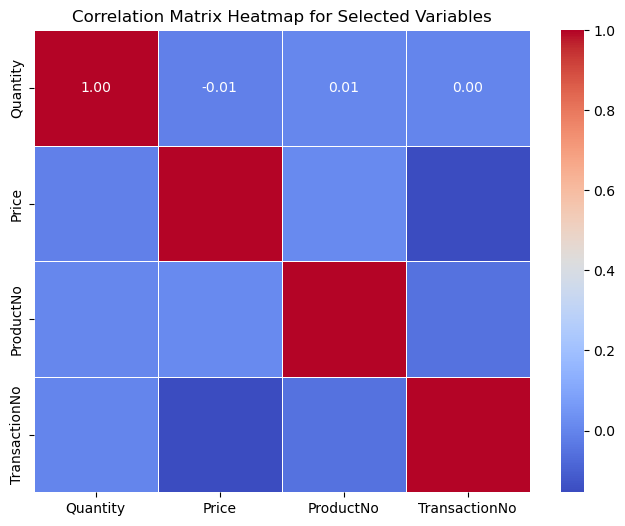

In [18]:
# Select specific columns for the correlation matrix
selected_columns = ['Quantity', 'Price', 'ProductNo', 'TransactionNo']

# Compute the correlation matrix for the selected columns
correlation_matrix = df_cleaned[selected_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix for selected columns:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Selected Variables')
plt.show()

## Cluster Analysis

### Data Prep

In [19]:
# Create the transaction-product matrix using crosstab
transaction_product_matrix = pd.crosstab(df_cleaned['TransactionNo'], df_cleaned['ProductName'])

# Display the transaction-product matrix
print("\nTransaction-Product Matrix:")
print(transaction_product_matrix)


Transaction-Product Matrix:
ProductName    10 Colour Spaceboy Pen  12 Coloured Party Balloons  \
TransactionNo                                                       
536365                              0                           0   
536366                              0                           0   
536367                              0                           0   
536368                              0                           0   
536369                              0                           0   
...                               ...                         ...   
581583                              0                           0   
581584                              0                           0   
581585                              0                           0   
581586                              0                           0   
581587                              0                           0   

ProductName    12 Daisy Pegs In Wood Box  12 Egg House Painted Wood  \
Tr

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\clust

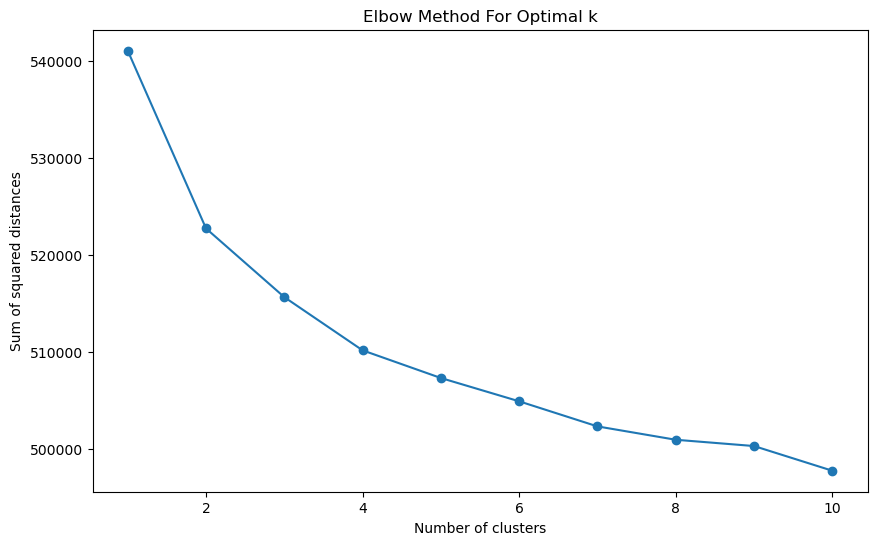

In [21]:
# Determine the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(transaction_product_matrix)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
# Apply K-means clustering
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
transaction_product_matrix['Cluster'] = kmeans.fit_predict(transaction_product_matrix)

print("\nTransaction-Product Matrix with Clusters:")
print(transaction_product_matrix)

C:\Users\rnehe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Transaction-Product Matrix with Clusters:
ProductName    10 Colour Spaceboy Pen  12 Coloured Party Balloons  \
TransactionNo                                                       
536365                              0                           0   
536366                              0                           0   
536367                              0                           0   
536368                              0                           0   
536369                              0                           0   
...                               ...                         ...   
581583                              0                           0   
581584                              0                           0   
581585                              0                           0   
581586                              0                           0   
581587                              0                           0   

ProductName    12 Daisy Pegs In Wood Box  12 Egg House Pain


DataFrame with Clusters:
        TransactionNo  ProductNo                          ProductName  Price  \
0              581482    22485.0        Set Of 2 Wooden Market Crates   21.0   
1              581475    22596.0  Christmas Star Wish List Chalkboard   11.0   
2              581475    23235.0             Storage Tin Vintage Leaf   12.0   
3              581475    23272.0    Tree T-Light Holder Willie Winkie   11.0   
4              581475    23239.0    Set Of 4 Knick Knack Tins Poppies   12.0   
...               ...        ...                                  ...    ...   
536320         536585    37449.0   Ceramic Cake Stand + Hanging Cakes   20.0   
536321         536590    22776.0         Sweetheart 3 Tier Cake Stand   20.0   
536322         536590    22622.0       Box Of Vintage Alphabet Blocks   20.0   
536323         536591    37449.0   Ceramic Cake Stand + Hanging Cakes   20.0   
536324         536597    22220.0     Cake Stand Lovebird 2 Tier White   20.0   

        Quant

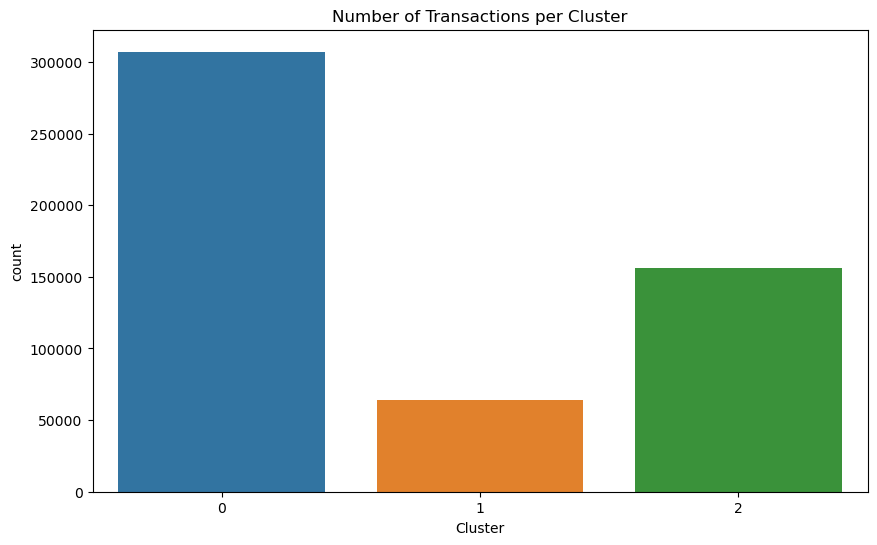

In [23]:
# Add the cluster labels to the original dataframe for analysis
df_cleaned['Cluster'] = df_cleaned['TransactionNo'].map(transaction_product_matrix['Cluster'])

# Display the dataframe with clusters
print("\nDataFrame with Clusters:")
print(df_cleaned)

# Optionally, visualize the clustering result
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_cleaned)
plt.title('Number of Transactions per Cluster')
plt.show()

## Analyze and Profile Clusters

In [24]:
# Aggregate data to understand the characteristics of each cluster
cluster_summary = df_cleaned.groupby('Cluster')['ProductName'].value_counts().unstack().fillna(0)
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
ProductName  10 Colour Spaceboy Pen  12 Coloured Party Balloons  \
Cluster                                                           
0                             202.0                       114.0   
1                              45.0                         6.0   
2                              73.0                        49.0   

ProductName  12 Daisy Pegs In Wood Box  12 Egg House Painted Wood  \
Cluster                                                             
0                                 43.0                       53.0   
1                                  5.0                       13.0   
2                                 36.0                       33.0   

ProductName  12 Hanging Eggs Hand Painted  12 Ivory Rose Peg Place Settings  \
Cluster                                                                       
0                                     7.0                              70.0   
1                                     0.0                      

In [25]:
# Profile each cluster by calculating the mean quantity and other statistics if available

# Add cluster labels again for the new data structure
df_cleaned['Cluster'] = df_cleaned['TransactionNo'].map(transaction_product_matrix['Cluster'])

# Aggregate quantity by cluster and product
quantity_summary = df_cleaned.groupby(['Cluster', 'ProductName'])['Quantity'].mean().unstack().fillna(0)
print("\nQuantity Summary by Cluster:")
print(quantity_summary)


Quantity Summary by Cluster:
ProductName  10 Colour Spaceboy Pen  12 Coloured Party Balloons  \
Cluster                                                           
0                         24.148515                   14.710526   
1                          1.666667                    1.000000   
2                         22.164384                    9.632653   

ProductName  12 Daisy Pegs In Wood Box  12 Egg House Painted Wood  \
Cluster                                                             
0                             6.255814                   1.792453   
1                             1.400000                   1.230769   
2                             2.027778                   1.151515   

ProductName  12 Hanging Eggs Hand Painted  12 Ivory Rose Peg Place Settings  \
Cluster                                                                       
0                                5.142857                          8.871429   
1                                0.000000          

In [26]:
# Select the top 5 products by average quantity in each cluster
top_products = quantity_summary.max().nlargest(5).index
quantity_summary_top = quantity_summary[top_products]

# Display the subset for visualization
print("\nTop Products Quantity Summary by Cluster:")
print(quantity_summary_top)


Top Products Quantity Summary by Cluster:
ProductName  Paper Craft Little Birdie  Tea Time Tea Towels  \
Cluster                                                       
0                              80995.0               1300.0   
1                                  0.0                  0.0   
2                                  0.0                  0.0   

ProductName  Girls Alphabet Iron On Patches  Medium Ceramic Top Storage Jar  \
Cluster                                                                       
0                                581.052632                      515.160000   
1                                 11.491228                        2.071429   
2                                 30.375000                        9.736111   

ProductName  Asstd Design 3d Paper Stickers  
Cluster                                      
0                                437.870968  
1                                  0.000000  
2                                 21.833333  


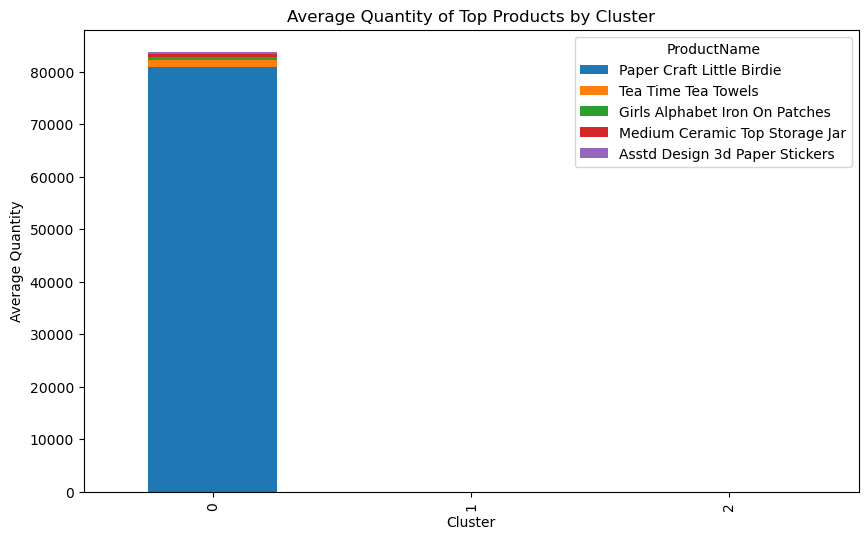

In [44]:
# Visualize the average quantity of top products in each cluster
quantity_summary_top.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Quantity of Top Products by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Quantity')
plt.legend(title='ProductName')
plt.show()

## Feature Engineering for Regression Analysis

### Aggregate Data

In [28]:
# Calculate Total Sales per Transaction
df_cleaned['TotalValue'] = df_cleaned['Quantity'] * df_cleaned['Price']

# Total number of transactions in each cluster
total_transactions_per_cluster = df_cleaned.groupby('Cluster')['TransactionNo'].nunique()

# Average transaction value in each cluster
average_transaction_value_per_cluster = df_cleaned.groupby('Cluster')['TotalValue'].mean()

# Total sales per cluster
total_sales_per_cluster = df_cleaned.groupby('Cluster')['TotalValue'].sum()

# Create a summary DataFrame
cluster_summary = pd.DataFrame({
    'Total Transactions': total_transactions_per_cluster,
    'Average Transaction Value': average_transaction_value_per_cluster,
    'Total Sales': total_sales_per_cluster
})

# Display the cluster summary
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
         Total Transactions  Average Transaction Value  Total Sales
Cluster                                                            
0                     17820                 160.786437   49375746.0
1                       150                  32.726296    2101290.0
2                      1819                  74.437319   11646984.0


## Regression Model Development

### Linear Regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# Prepare the feature matrix X and target vector y
X = df_cleaned[['Quantity', 'Price', 'Cluster']]
y = df_cleaned['TotalValue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the dataframe with clusters
print("\nDataFrame with Clusters and TotalValue:")
print(df)


DataFrame with Clusters and TotalValue:
       TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Po

In [32]:
# Create and fit the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the entire dataset
df_cleaned['PredictedTotalValue'] = model.predict(X)

# Display the dataframe with predicted total sales
print("\nDataFrame with Predicted Total Sales:")
print(df_cleaned.head())

# Aggregate predicted total sales by cluster
predicted_sales_by_cluster = df_cleaned.groupby('Cluster')['PredictedTotalValue'].sum()

# Display the predicted total sales by cluster
print("\nPredicted Total Sales by Cluster:")
print(predicted_sales_by_cluster)


DataFrame with Predicted Total Sales:
   TransactionNo  ProductNo                          ProductName  Price  \
0         581482    22485.0        Set Of 2 Wooden Market Crates   21.0   
1         581475    22596.0  Christmas Star Wish List Chalkboard   11.0   
2         581475    23235.0             Storage Tin Vintage Leaf   12.0   
3         581475    23272.0    Tree T-Light Holder Willie Winkie   11.0   
4         581475    23239.0    Set Of 4 Knick Knack Tins Poppies   12.0   

   Quantity  CustomerNo  Cluster  TotalValue  PredictedTotalValue  
0      12.0     17490.0        0       252.0           155.718602  
1      36.0     13069.0        0       396.0           405.342561  
2      12.0     13069.0        0       144.0           133.215427  
3      12.0     13069.0        0       132.0           130.715074  
4       6.0     13069.0        0        72.0            64.558555  

Predicted Total Sales by Cluster:
Cluster
0    4.943678e+07
1    1.961185e+06
2    1.171483e+07
Name:

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 6412.449404193894
Root Mean Squared Error (RMSE): 80.07777097418418
Mean Absolute Error (MAE): 17.044264456942134
R-squared (R²): 0.9542726398884065
